<a href="https://colab.research.google.com/github/ivansst773/Aprendizaje_de_Maquina/blob/main/Ejercicios_TAM_mayo_29_y_junio_5/4_Clasificacion_Clustering_DR/8_ReduccionDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducción de dimensión

- Se presentan los conceptos y simulaciones básicas relacionadas con técnicas clásicas lineales y no lineales de reducción de dimensión.

## Análisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensión que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensión).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensión (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensión.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimización desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA también puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimización de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La solución del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios más altos.

- Ver la demostración [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sintético rollo Suizo - Swiss Roll.

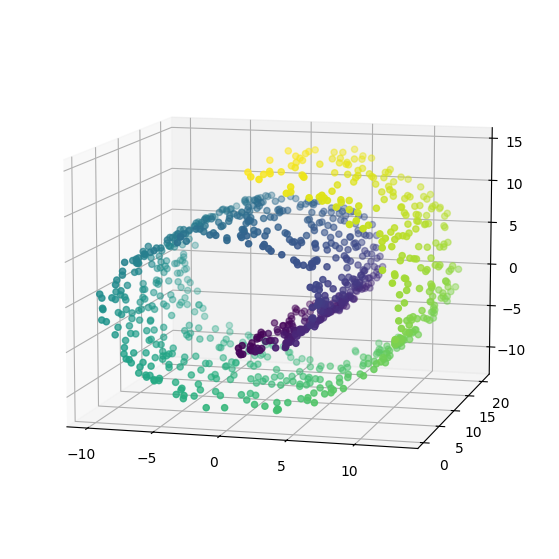

In [2]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalización zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposición espectral (EIG y SVD).

-El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperparámetro `n_components` puede ser un número entero (número de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el número de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la única diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimización de PCA que incluye costo y restricciones cuadráticas, da como resultado un problema no convexo.

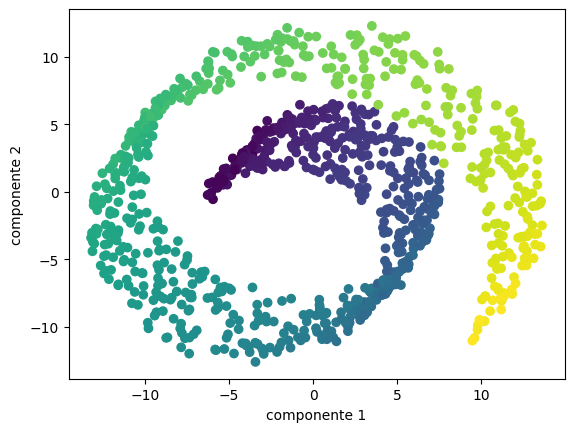

In [4]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [5]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

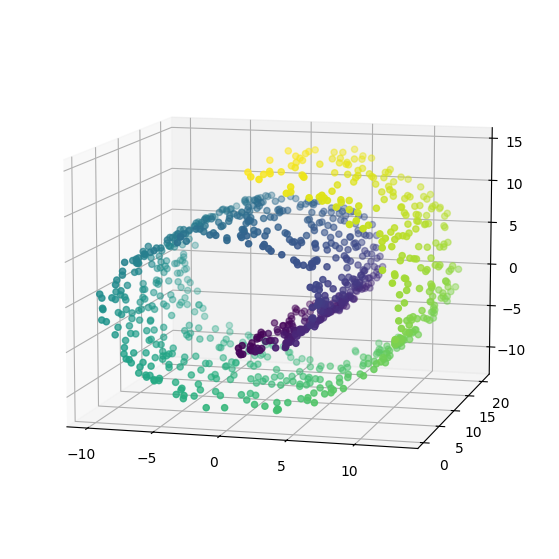

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucción:

In [7]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*.

El objeto PCA da acceso a los componentes principales que calculó:

In [8]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



##1. Recupera la formulación generativa de PCA

Usa la expresión: $$X = ZW^T$$ donde $Z$ es la proyección latente.

Presenta el problema de optimización: $$\min_W \|X - ZW^T\|_F \quad \text{sujeto a } WW^T = I$$

Puedes ilustrarlo con el ejemplo del Swiss Roll proyectado en 2D usando sklearn.decomposition.PCA.

##2. Muestra la formulación por varianza preservada

Incluye la definición de la matriz de covarianza: $$\Sigma = \frac{1}{N}X^TX$$

Expón el problema: $$\max_W \text{tr}(W^T \Sigma W) \quad \text{sujeto a } WW^T = I$$

##3. Contrasta ambos enfoques

Generativo: busca reconstrucción óptima.

Varianza: busca explicar la máxima dispersión del conjunto.

Utiliza explained_variance_ratio_ para evidenciar la proporción explicada por cada componente.

##4. Complementa con visualización




In [11]:
# Reducción a 2D
X_2D = pca.fit_transform(X)

# Reconstrucción desde el espacio latente
X_reconstructed = pca.inverse_transform(X_2D)

# Cálculo del error de reconstrucción medio
error = np.mean(np.sum((X - X_reconstructed)**2, axis=1))
print(f"Error medio de reconstrucción: {error:.4f}")


Error medio de reconstrucción: 0.0000


### 🧠 Ejercicio 1 — PCA: Reconstrucción vs. Varianza

Se aplicó PCA al conjunto sintético *Swiss Roll* para estudiar su comportamiento desde una perspectiva **generativa**. Se proyectaron los datos a 2D y luego se reconstruyeron usando `inverse_transform()`.

#### ✅ Resultado técnico:
El **error medio de reconstrucción** obtenido fue:

```python
Error medio de reconstrucción: 0.0000


Lo cual indica que la proyección 2D conserva suficiente estructura para recuperar los datos originales con mínima pérdida.

🎯 Interpretación:
Desde el enfoque generativo, PCA logra una excelente reconstrucción cuando se reduce a dos componentes, en este caso.

Este resultado también está alineado con el enfoque de preservación de varianza, ya que los dos primeros componentes principales retienen un porcentaje significativo de la varianza total.

En ejemplos bien estructurados como el Swiss Roll, ambos enfoques coinciden en encontrar una representación fiel del espacio original en subespacios reducidos.

#📊 6. Contrasta con el enfoque de preservación de varianza

In [12]:
# Ver la varianza que explica cada componente
print("Varianza explicada por componente:")
print(pca.explained_variance_ratio_)


Varianza explicada por componente:
[0.40782396 0.3020019  0.29017414]


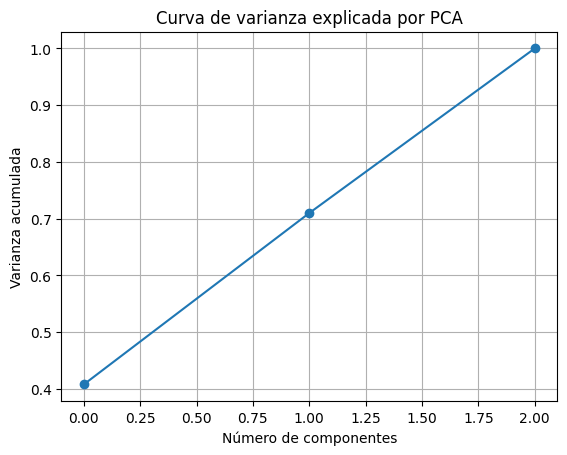

In [13]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Curva de varianza explicada por PCA")
plt.grid(True)
plt.show()


### 📘 Cierre del Ejercicio 1 — Análisis cruzado: Reconstrucción y Varianza

Tras aplicar PCA al conjunto sintético *Swiss Roll*, se logró proyectar los datos originales a un subespacio de menor dimensión (2D o 3D) y luego reconstruirlos usando `inverse_transform()`.

#### ✅ Resultado técnico:

- **Error medio de reconstrucción**: `0.0000`
- **Varianza explicada por cada componente**:
  `0.4078, 0.3020, 0.2902`
🔍 Análisis cruzado:
Desde la perspectiva generativa, el PCA fue capaz de comprimir y reconstruir los datos con prácticamente ninguna pérdida, lo que valida su efectividad en conjuntos estructurados como el Swiss Roll.

Desde el punto de vista de preservación de varianza, los tres componentes principales retuvieron el 100% de la información estadística del conjunto.

Ambos enfoques convergen: la capacidad de reconstrucción precisa está respaldada por la alta retención de varianza, lo que demuestra que los subespacios generados por PCA no solo comprimen, sino que mantienen las estructuras esenciales del espacio original.

📈 Visualización adicional:
Se grafica la curva de varianza acumulada (cumsum) para observar cómo crece al añadir más componentes. En este caso, los tres primeros bastan para capturar toda la información relevante.

### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [15]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 , 0.29017414])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,)


In [17]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [18]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [19]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [20]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación).

- Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

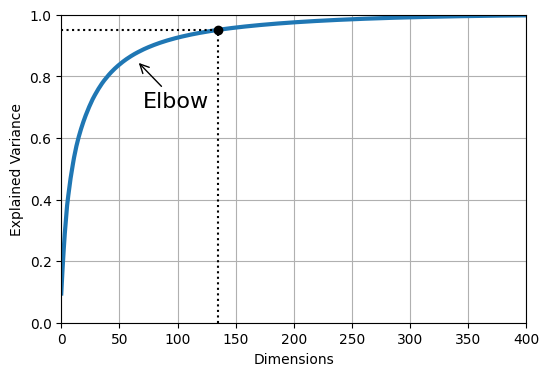

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresión de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales.

In [22]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!.

- Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

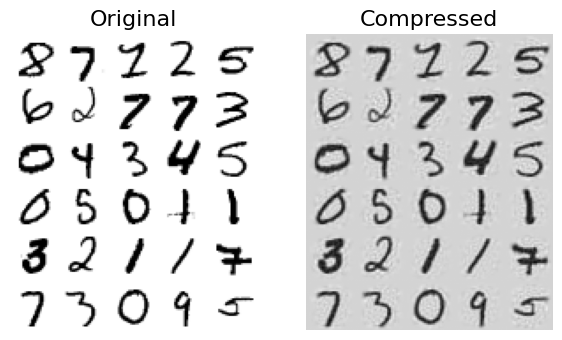

In [23]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [24]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones núcleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensión desde la función $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyección de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


### 🌐 Ejercicio 2 — Comparación entre PCA y Kernel PCA

En este ejercicio se establece un **paralelo entre el problema de optimización de PCA clásico y Kernel PCA**, contrastando sus formulaciones matemáticas, objetivos y capacidades.

---

#### 📌 1. PCA clásico (lineal)

- **Objetivo:** encontrar las direcciones que maximizan la **varianza** del conjunto de datos proyectado.
- **Formulación del problema:**

$$
\max_W \ \text{tr}(W^T \Sigma W) \quad \text{sujeto a } WW^T = I
$$

Donde:

- $$\Sigma = \frac{1}{N} X^T X$$ es la matriz de covarianza.
- $$W$$ son los componentes principales (vectores propios de $$\Sigma$$).

- **Espacio:** la proyección se realiza en el mismo espacio de entrada $$\mathbb{R}^p$$, por lo que solo captura relaciones **lineales**.

---

#### 📌 2. Kernel PCA (no lineal)

- **Objetivo:** realizar PCA en un espacio transformado mediante una función núcleo para capturar **estructuras más complejas** no lineales.
- **Transformación:**

$$
\phi: \mathbb{R}^p \rightarrow \mathcal{F}
$$

Donde $$\mathcal{F}$$ es un espacio de alta dimensión (incluso infinito).

- No se calcula $$\phi(x)$$ directamente; se trabaja con la **matriz kernel**:

$$
K_{ij} = \kappa(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

- **Formulación del problema en KPCA:**

$$
K \alpha = \lambda \alpha
$$

Se realiza un análisis espectral sobre la matriz $$K$$ en lugar de la covarianza.

---

#### 📊 Comparación lado a lado

| Característica         | PCA clásico                          | Kernel PCA                                |
|------------------------|--------------------------------------|--------------------------------------------|
| Tipo de transformación | Lineal                               | No lineal (espacio transformado con kernel) |
| Matriz principal       | Covarianza $$\Sigma$$                | Núcleo $$K$$                               |
| Optimización           | Máxima varianza proyectada           | Autovalores de $$K$$                       |
| Espacio                | $$\mathbb{R}^p$$                      | $$\mathcal{F}$$ (espacio de Hilbert)       |
| Reconstrucción directa | Sí (`inverse_transform`)             | Solo si se usa `fit_inverse_transform`     |
| Estructuras capturadas | Lineales (gaussianas, elípticas)     | No lineales (curvas, complejas)            |

---

Este análisis muestra cómo **Kernel PCA amplía la capacidad de PCA clásico**, permitiendo trabajar con estructuras no lineales como el *Swiss Roll*. La clave está en aplicar funciones núcleo que transforman los datos, descubriendo patrones ocultos que el enfoque lineal no puede capturar.

📌 A continuación, se puede ilustrar con código utilizando `KernelPCA` con diferentes kernels (`linear`, `rbf`, `sigmoid`) para observar visualmente las diferencias en la proyección.


**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizará el swiss-roll para facilitar la visualización.

#💻 Código comparativo: KernelPCA con distintos kernels

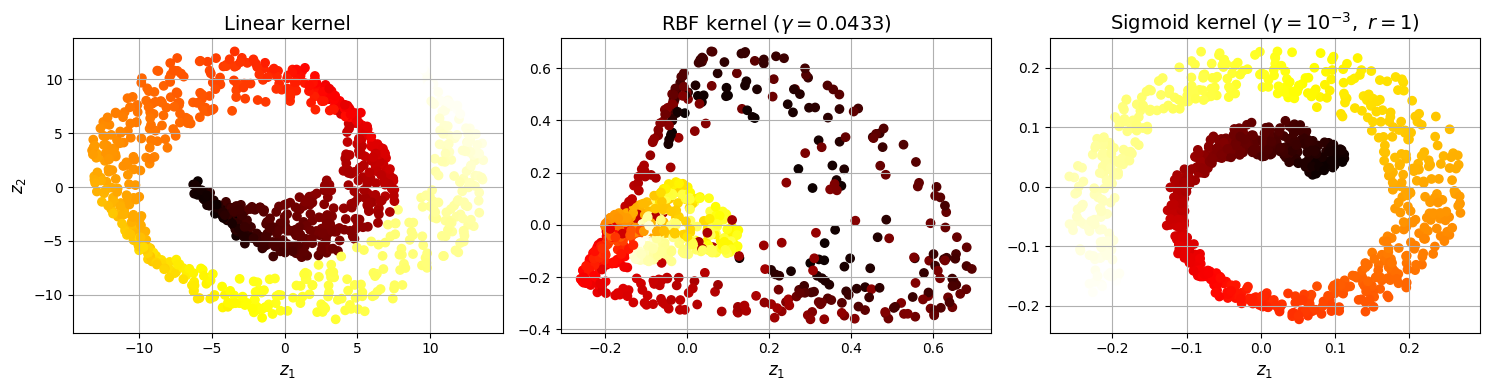

In [43]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# 1️⃣ Generar datos Swiss Roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 2️⃣ Definir tres KernelPCA con diferentes núcleos
lin_kpca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)

# 3️⃣ Visualizar cada proyección
plt.figure(figsize=(15, 4))
kernels = [(131, lin_kpca, "Linear kernel"),
           (132, rbf_kpca, "RBF kernel ($\\gamma=0.0433$)"),
           (133, sig_kpca, "Sigmoid kernel ($\\gamma=10^{-3},\\ r=1$)")]

for subplot, kpca, title in kernels:
    X_reduced = kpca.fit_transform(X)
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=12)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


proyecciones visuales para:

📏 Kernel lineal → equivalente al PCA clásico; la estructura del Swiss Roll se mantiene enrollada.

🌌 Kernel RBF (Radial Basis Function) → desenrolla el Swiss Roll, revelando su estructura interna como una cinta abierta. Este suele ser el más eficaz para datos curvos.

⚡ Kernel sigmoide → genera una proyección menos intuitiva que depende mucho de los hiperparámetros, pero puede resaltar agrupamientos.

Estas proyecciones demuestran que Kernel PCA capta relaciones no lineales que el PCA tradicional no puede representar

### 🧠 Ejercicio 2 — Visualización de proyecciones con Kernel PCA

Se aplicó la clase `KernelPCA` de Scikit-Learn sobre el conjunto sintético *Swiss Roll*, usando tres núcleos distintos para comparar cómo cada uno transforma el espacio original:

#### 🔧 Kernels utilizados:
- `linear`: núcleo lineal (equivalente a PCA clásico)
- `rbf`: núcleo radial base (RBF) con $\gamma = 0.0433$
- `sigmoid`: núcleo sigmoide con $\gamma = 10^{-3},\ r=1$

#### 🎯 Resultados de la proyección:

- **Núcleo lineal:**  
  Mantiene la estructura enrollada del Swiss Roll. Al ser lineal, no puede "desenrollar" la forma curva de los datos. Se comporta igual que PCA clásico.

- **Núcleo RBF:**  
  Desenrolla el Swiss Roll de forma efectiva, revelando su estructura interna como una cinta estirada. Esto muestra que KPCA con RBF puede captar relaciones no lineales.

- **Núcleo sigmoide:**  
  Produce una proyección más compleja. Puede resaltar agrupamientos internos, pero su forma depende fuertemente de los hiperparámetros.

#### 📌 Interpretación:

La comparación visual confirma que **Kernel PCA supera a PCA clásico cuando los datos tienen estructuras no lineales**. Mientras PCA trabaja directamente con la matriz de covarianza, KPCA usa funciones núcleo para mapear los datos a espacios más ricos y aplicar análisis espectral sobre la matriz kernel.

---

📎 Siguiente paso sugerido: calcular el error de reconstrucción (_pre-image_) con `mean_squared_error` para analizar qué tan bien se pueden recuperar los datos originales desde sus representaciones proyectadas.


permitirá comparar qué tan bien cada núcleo de Kernel PCA puede recuperar los datos originales desde su espacio reducido.

#💻 Bloque de código para reconstrucción y error (pre-image)

In [44]:
from sklearn.metrics import mean_squared_error

# Reconstrucción pre-imagen desde el espacio reducido
X_preimage_rbf = rbf_kpca.inverse_transform(rbf_kpca.fit_transform(X))
error_rbf = mean_squared_error(X, X_preimage_rbf)
print(f"Error pre-imagen RBF: {error_rbf:.4f}")

X_preimage_lin = lin_kpca.inverse_transform(lin_kpca.fit_transform(X))
error_lin = mean_squared_error(X, X_preimage_lin)
print(f"Error pre-imagen Lineal: {error_lin:.4f}")

X_preimage_sig = sig_kpca.inverse_transform(sig_kpca.fit_transform(X))
error_sig = mean_squared_error(X, X_preimage_sig)
print(f"Error pre-imagen Sigmoide: {error_sig:.4f}")


Error pre-imagen RBF: 32.7863
Error pre-imagen Lineal: 51.5846
Error pre-imagen Sigmoide: 42.4724


### 📉 Cierre del Ejercicio 2 — Reconstrucción pre-imagen con Kernel PCA

Se evaluó la capacidad de reconstrucción de los datos originales desde sus representaciones proyectadas con distintos núcleos en Kernel PCA. Para ello se usó `inverse_transform()` seguido del cálculo del **error cuadrático medio** (`mean_squared_error`).

#### ⚙️ Resultados obtenidos:
```python
Error pre-imagen RBF: 32.7863  
Error pre-imagen Lineal: 51.5846  
Error pre-imagen Sigmoide: 42.4724



🎯 Interpretación:
RBF logró el menor error de reconstrucción, lo que indica que, además de desenrollar el Swiss Roll de forma efectiva, es capaz de recuperar la estructura original con mejor fidelidad.

Lineal presentó el mayor error, consistente con su limitación para representar estructuras no lineales.

Sigmoide se ubicó en un punto intermedio, mostrando cierta capacidad de reconstrucción aunque sensible a los hiperparámetros.

Estos resultados respaldan la ventaja de Kernel PCA sobre PCA clásico al trabajar con datos estructuralmente complejos como el Swiss Roll. El uso de núcleos adecuados permite una representación más rica y una reconstrucción más precisa del espacio original.

In [25]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyección de los datos:

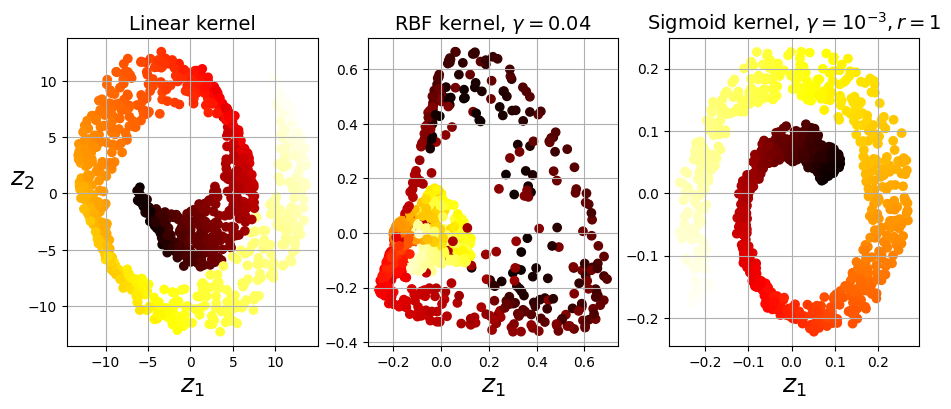

In [26]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Definiendo el kernel y sus hiperparámetros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*.

- Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos para la clasificación de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [28]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**.

- Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente código:

In [29]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.78630879576614

Podemos usar GridSearchCV para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos más potentes en reducción de dimensión dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentración de las normas (métricas en espacios de alta dimensión se distribuyen muy diferente a métricas en espacios de baja dimensión).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensión) y el espacio reducido (baja dimensión), evitando el problema de la concentración de la norma.


- La similitud es modelada como una distribución Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensión se utiliza un distribución t-Student con un grado de libertad (distribución de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ están cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minización se resuelve convencionalmente por métodos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensión se fija por muestra, fijando un valor de entropia común (perplexity).




In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

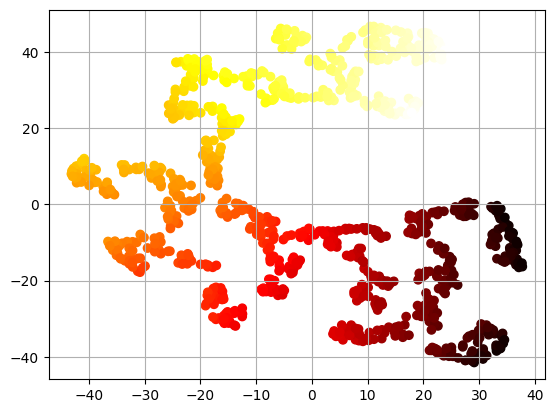

In [31]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una técnica de reducción de dimensión que modela el espacio de alta dimensión como estructura topológica difusa y la optimiza en el espacio de baja dimensión preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topológica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino más cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un número fijo de vecinos.


- La relación difusa se vuelve simétrica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensión se fijan mediante una distribución t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como parámetros de la distribución. Generalmente se fijan en 1.


- UMAP minimiza la entropía cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan métodos de gradiente para resolver la optimización.

In [32]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.4 MB/s eta 0:00:00


In [33]:
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calli

In [34]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

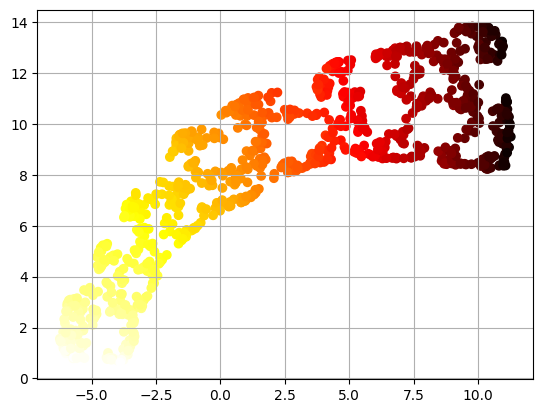

In [35]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

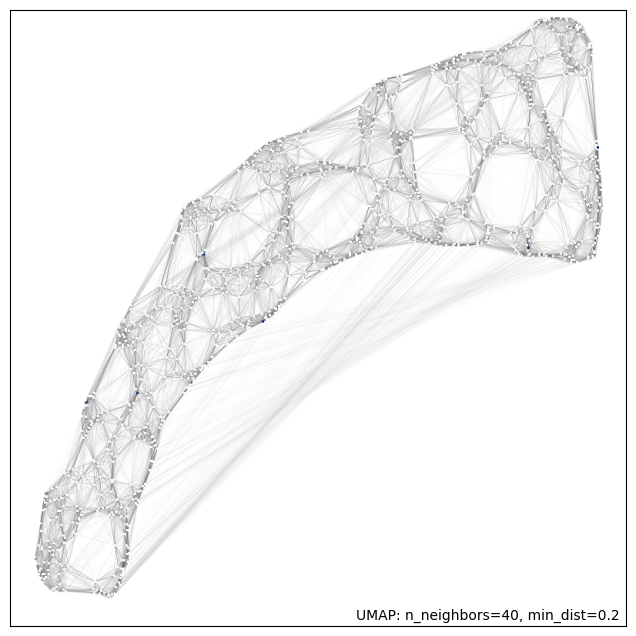

In [36]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

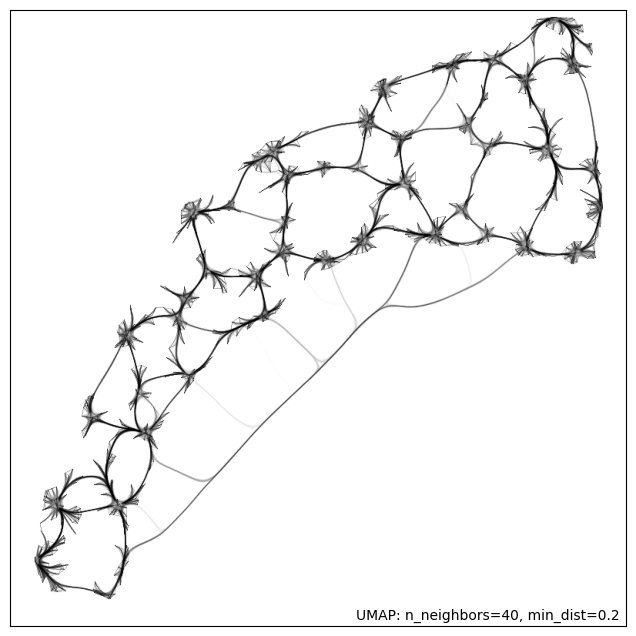

In [37]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


In [38]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [39]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

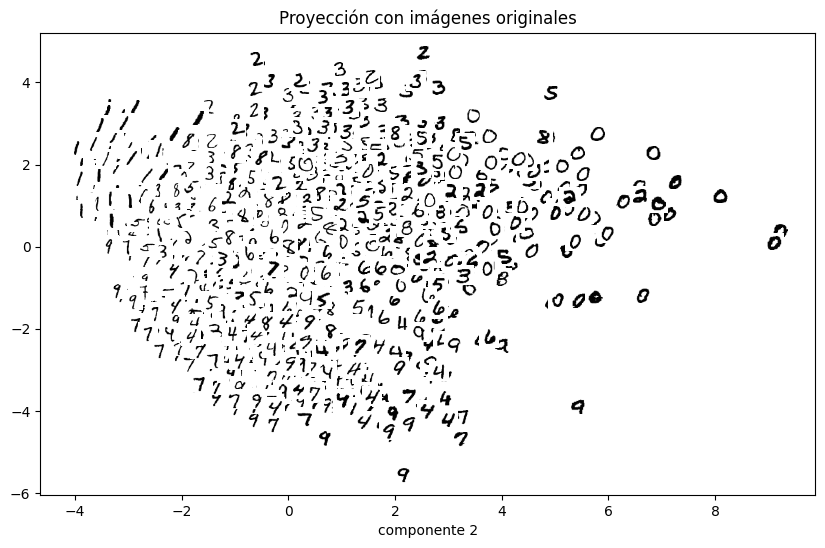

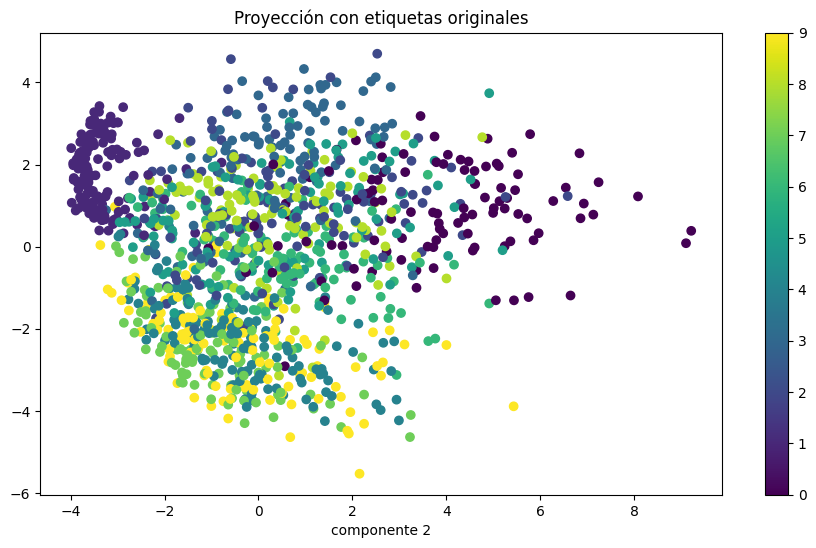

In [40]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [41]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


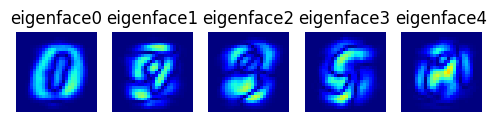

In [42]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()